In [4]:
from beene import beene_model
from numpy import random
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
# creating Random data with 3000 sample and 100 genes per sample.
Xt = random.uniform(-1,1,(3000,100))
# With 2 biological categories 
yt = random.randint(0,2,3000)
# With 3 batches
bt = random.randint(0,3,3000)

In [6]:
# Creating the BEENE model
# with embedding dimension of 5
# Size of first hiddent layer is 50, and second hidden
# layer is 20
# reconstruction_weight: 1,
# batch_weight: 2,
# bio_weight: 2,

my_model = beene_model()
my_model.get_hybrid_model_1(100,[50,20],5,3,2,1,2,1)

Creating model


(<tensorflow.python.keras.engine.functional.Functional at 0x7f487491dd50>,
 <tensorflow.python.keras.engine.functional.Functional at 0x7f48780c4cd0>)

In [7]:
# Creating one hot vectors for batch variables

bt = np.reshape(bt,(-1,1))
enc_bi = OneHotEncoder(handle_unknown='ignore')
enc_bi.fit(bt)
bt = enc_bi.transform(bt)
bt = bt.todense()

# Number of classes in biological variables is 2. 
# So creating one-hot vector is not necessery

In [ ]:
''' now as kBET does not have a python distribution, we can not directly use it. We need to manually split the
data, train the model and pass the embedding to R enviroment for calculation'''

X_train, X_test, Y_Platform_train, Y_Platform_test,Y_ER_train,Y_ER_test = train_test_split(
                                          Xt, bt, yt,test_size=0.20,random_state=4)

      #Getting separate validation data
X_train, X_val, Y_Platform_train, Y_Platform_val,Y_ER_train,Y_ER_val = train_test_split(
                                           X_train, Y_Platform_train, Y_ER_train ,test_size=0.25,random_state=4)

my_model.train_model(X_train,Y_Platform_train,Y_ER_train,X_val,Y_Platform_val,Y_ER_val,300)


if  Y_Platform_test.ndim >1:
  Y_Platform_test = [np.argmax(i) for i in Y_Platform_test]



In [20]:
test_embedding = my_model.get_beene_embeddings(X_test)
Y_Platform_test = np.array(Y_Platform_test)

The following codes are for tranferring data between python and R.
Read more at https://ipython.org/ipython-doc/2/config/extensions/rmagic.html

In [9]:
%load_ext rpy2.ipython

In [10]:
%%R
# installing kBET
library(devtools)
install_github('theislab/kBET')

R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/tmp/RtmpDb0D4v/downloaded_packages’
R[write to console]: 
R[write to console]: 



✔  checking for file ‘/tmp/RtmpDb0D4v/remotes3f6a2ab3e3/theislab-kBET-4c9dafa/DESCRIPTION’
─  preparing ‘kBET’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘kBET_0.99.6.tar.gz’
   


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [21]:
%%R -i Y_Platform_test
batch <- Y_Platform_test

[1] 600   5
[1] 600
[1] 0.04700000 0.01666667 0.04166667 0.08333333


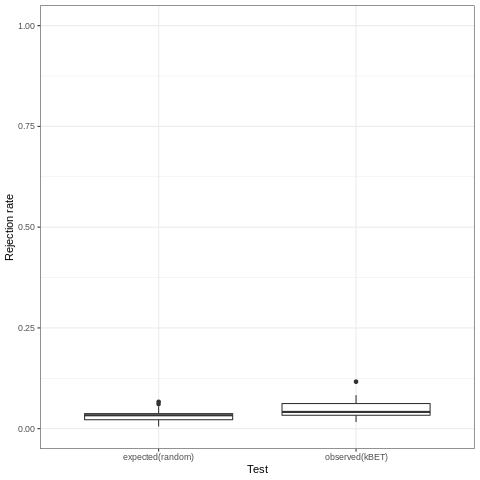

In [24]:
%%R -i test_embedding

print(dim(test_embedding))
print(dim(batch))
library(kBET)

batch.estimate <- kBET(test_embedding ,batch, do.pca =FALSE, n_repeat = 50)
result <- batch.estimate$summary$kBET.observed
print(result)
